<h2 style='color:purple' align='center'>MLRM</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rssmahesh1/NewMLA/main/6_train_test_split/carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

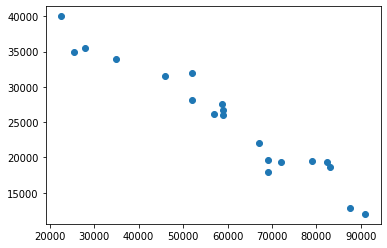

In [5]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

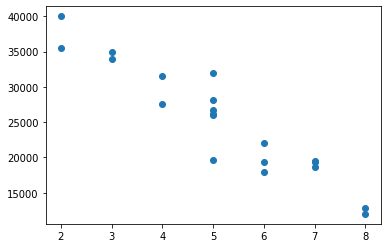

In [6]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [7]:
X = df[['Mileage','Age(yrs)']]

In [8]:
y = df['Sell Price($)']

In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant( df[['Mileage','Age(yrs)']] )
Y = df['Sell Price($)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
X_train

,const,Mileage,Age(yrs)
7,1.0,72000,6
18,1.0,87600,8
14,1.0,82450,7
16,1.0,28000,2
1,1.0,35000,3
5,1.0,59000,5
3,1.0,22500,2
10,1.0,83000,7
4,1.0,46000,4
15,1.0,25400,3


In [11]:
X_test

,const,Mileage,Age(yrs)
12,1.0,59000,5
17,1.0,69000,5
19,1.0,52000,5
11,1.0,79000,7
13,1.0,58780,4
6,1.0,52000,5


In [12]:
y_train

7     19300
18    12800
14    19400
16    35500
1     34000
5     26750
3     40000
10    18700
4     31500
15    35000
9     22000
0     18000
2     26100
8     12000
Name: Sell Price($), dtype: int64

In [13]:
y_test

12    26000
17    19700
19    28200
11    19500
13    27500
6     32000
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [16]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary2()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.957     
Dependent Variable: Sell Price($)    AIC:                253.0583  
Date:               2021-08-24 04:57 BIC:                254.9755  
No. Observations:   14               Log-Likelihood:     -123.53   
Df Model:           2                F-statistic:        146.1     
Df Residuals:       11               Prob (F-statistic): 1.20e-08  
R-squared:          0.964            Scale:              3.4377e+06
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     46880.3998 1370.2227 34.2137 0.0000 43864.5601 49896.2395
Mileage      -0.1268    0.1497 -0.8474 0.4148    -0.4562     0.2026
Age(yrs)  -2786.8747 1733.2069 -1.6079 0.1362 -6601.6374  1027.8880
-------------------------------------------------------------------
Omnibus:              0.720         Durbin-Watson:           1.979 
Prob(Omnibus):        0.698         Jarque-Bera (JB):        0.684 
Skew:                 -0.418        Prob(JB):                0.710 
Kurtosis:             2.312         Condition No.:           224505
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [18]:
clf.predict(X_test)

array([25463.61340924, 24195.40780283, 26351.35733373, 17353.45287838,
       28278.3885916 , 26351.35733373])

In [19]:
y_test

12    26000
17    19700
19    28200
11    19500
13    27500
6     32000
Name: Sell Price($), dtype: int64

In [20]:
clf.score(X_test, y_test)

0.505505767891363

**random_state argument**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,const,Mileage,Age(yrs)
7,1.0,72000,6
10,1.0,83000,7
5,1.0,59000,5
6,1.0,52000,5
3,1.0,22500,2
18,1.0,87600,8


P-P Plot

<Figure size 576x432 with 0 Axes>

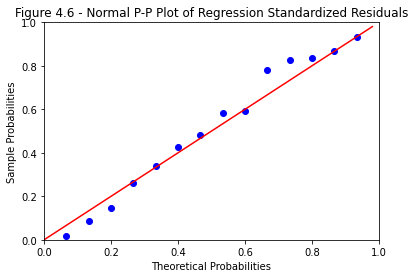

In [22]:
def draw_pp_plot( model, title ):
  probplot = sm.ProbPlot( model.resid );
  plt.figure( figsize = (8, 6) );
  probplot.ppplot( line='45' );
  plt.title( title );
  plt.show();
draw_pp_plot( model_1,
            "Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals"
);

 Residual Plot